In [127]:
import sympy as sp
from sympy import symbols, diff, solve, lambdify
import numpy as np
import matplotlib.pyplot as plt

Oppgave 1

In [140]:
# Definerer symbolene
q1, q2, c, a, b = symbols('q1 q2 c a b')

def P_demand(Q, a, b):
    return a - b * Q

def profit(q1, q2, c, a, b):
    return (P_demand(q1 + q2, a, b) - c) * q1

# Deriverer profittfunksjonen for Dr choice 2 med hensyn på q2
d_profit2_Q = diff(profit(q2, q1, c, a, b), q2)

# Løser for optimal mengde q2 gitt q1
Q2_sol1 = solve(d_profit2_Q, q2)[0]

# Deriverer profittfunksjonen for Olivita 1 med hensyn på q1
d_profit1_Q = diff(profit(q1, Q2_sol1, c, a, b), q1)

# Løser for optimal mengde q1
Q1_sol = solve(d_profit1_Q, q1)[0]

# Erstatter q1 i Q2_sol1 for å finne optimal mengde q2
Q2_sol2 = Q2_sol1.subs({q1: Q1_sol})

# Setter opp en funksjon for å beregne Stackelberg-løsningen
stackelberg = lambdify((a, b, c), (Q1_sol, Q2_sol2))

# Bruker funksjonen med gitt a, b, c for Olivita og Dr Choice
optimal_q1, optimal_q2 = stackelberg(990, 1/60, 50)

optimal_q1, optimal_q2

(28200.0, 14100.0)

Det optimale kvantumet for Olivita vil være 28 200 flasker produsert og 14 100 flasker for DR Choice

In [141]:
# Definerer symboler
q1, q2 = symbols('q1 q2')

# Etterspørselsfunksjon
def P_demand(Q):
    return 990 - (1/60) * Q

# Profittfunksjon for Olivita
def profit_1(q1, q2):
    return (P_demand(q1 + q2) - 50) * q1 - 3000000

# Profittfunksjon for Dr Choice
def profit_2(q1, q2):
    return (P_demand(q1 + q2) - 50) * q2 - 3000000

# Deriverer profittfunksjonen for Dr Choice mht q2
d_profit_2 = diff(profit_2(q1, q2), q2)

# Finn reaksjonsfunksjonen til Dr Choice
Q2_sol1 = solve(d_profit_2, q2)[0]

# Deriverer profittfunksjonen for Olivita mht q1 med Dr choice reaksjonsfunksjon satt inn
d_profit_1 = diff(profit_1(q1, Q2_sol1), q1)

# Finn optimalt kvantum for Olivita
Q1_sol = solve(d_profit_1, q1)[0]

# Sett optimalt kvantum for Olivita inn i reaksjonsfunksjonen til Olivita
Q2_sol2 = Q2_sol1.subs(q1, Q1_sol)

# Funksjon for å finne etterspørselen
def demand(q1, q2):
    return P_demand(q1 + q2)

# Beregne optimal etterspørsel og pris
optimal_pris = demand(Q1_sol, Q2_sol2)

# Profitt for Olivita og Dr Choice
profit_Olivita = profit_1(Q1_sol, Q2_sol2)
profit_Dr_Choice = profit_2(Q1_sol, Q2_sol2)

# Vis resultater
print(f"Optimalt kvantum for Olivita (q1): {Q1_sol}")
print(f"Optimalt kvantum for Dr Choice (q2): {Q2_sol2}")
print(f"Markedspris: {optimal_pris}")
print(f"Profitt for Olivita: {profit_Olivita}")
print(f"Profitt for Olivita: {profit_Dr_Choice}")

Optimalt kvantum for Olivita (q1): 28200.0000000000
Optimalt kvantum for Dr Choice (q2): 14100.0000000000
Markedspris: 285.000000000000
Profitt for Olivita: 3627000.00000000
Profitt for Olivita: 313500.000000000


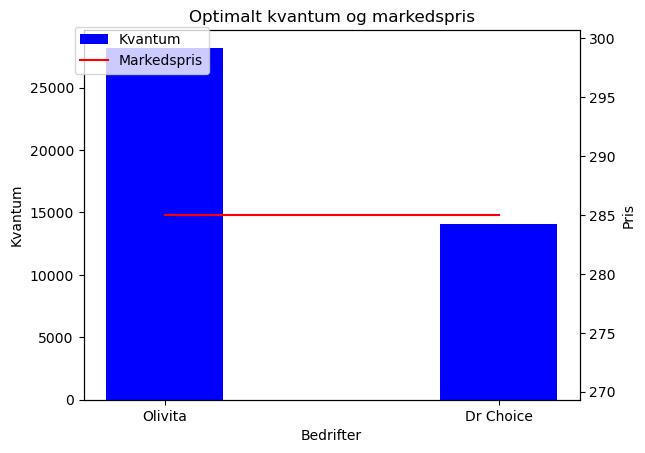

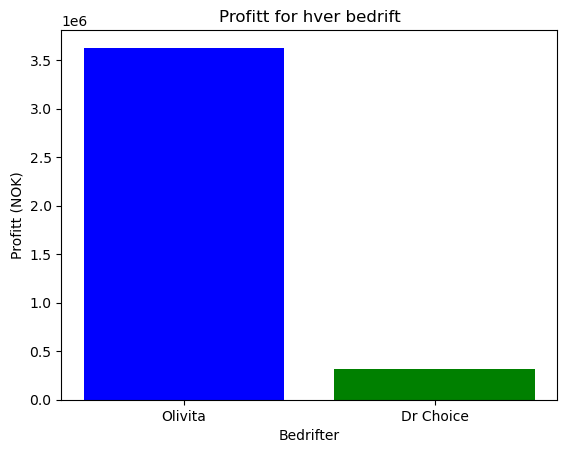

In [131]:
# Optimalt kvantum for Olivita og Dr Choice fra tidligere beregninger
Q1_sol = 28200
Q2_sol = 14100

# Markedspris og profitt for hver bedrift
optimal_price = 285
profit_Olivita = 3627000
profit_Dr_Choice = 313500

# Lager kvantumplot
fig, ax1 = plt.subplots()

# Sette navn på aksene
ax1.set_xlabel('Bedrifter')
ax1.set_ylabel('Kvantum')

# Sette tittel
ax1.set_title('Optimalt kvantum og markedspris')

# Plotte kvantum for hver bedrift
bar_width = 0.35
index = np.arange(2)
quantities = [Q1_sol, Q2_sol]
ax1.bar(index, quantities, bar_width, label='Kvantum', color='b')

# Legge til markedspris i plottet
ax2 = ax1.twinx()
ax2.set_ylabel('Pris')
ax2.plot([0, 1], [optimal_price, optimal_price], color='r', label='Markedspris')

# Legge til legend og visningsinnstillinger
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.xticks(index, ('Olivita', 'Dr Choice'))

# Vis plottet for kvantum og pris
plt.show()

# Lager profittplot
fig, ax = plt.subplots()
ax.set_xlabel('Bedrifter')
ax.set_ylabel('Profitt (NOK)')
ax.set_title('Profitt for hver bedrift')
profits = [profit_Olivita, profit_Dr_Choice]
ax.bar(['Olivita', 'Dr Choice'], profits, color=['blue', 'green'])

# Vis plottet for profitt
plt.show()

Oppgave 2A

In [132]:
from sympy import symbols, solve, Eq, N

# Definisjon av symboler for kvantumene til hvert bryggeri
qM, qG, qB = symbols('qM qG qB', real=True, positive=True)

# Marginalkostnader og faste kostnader
cM = 7  # Mack
cG = 10  # Graff
cB = 10  # Bryggeri 13
FC = 300000  # Faste kostnader for hvert bryggeri

# Etterspørselsfunksjonen
P = 175 - 4*(qM + qG + qB)

# Profittfunksjonene for hvert bryggeri
profit_M = (P - cM) * qM - FC
profit_G = (P - cG) * qG - FC
profit_B = (P - cB) * qB - FC

# Førsteordensbetingelsene for profittmaksimering
FOC_M = profit_M.diff(qM)
FOC_G = profit_G.diff(qG)
FOC_B = profit_B.diff(qB)

# Løsning av likevektssystemet
equilibrium_quantities = solve([FOC_M, FOC_G, FOC_B], (qM, qG, qB))

# Konverterer symboliske løsninger til numeriske løsninger
numerical_quantities = {key: N(value) for key, value in equilibrium_quantities.items()}

numerical_quantities

{qB: 10.1250000000000, qG: 10.1250000000000, qM: 10.8750000000000}

Antall flasker produsert for Bryggeri 13: 10 125, Graff brygghus: 10 125 og Mack Mikrobryggeri: 10 875

In [133]:
# Definisjon av symboler for kvantumene til hvert bryggeri
qM, qG, qB = symbols('qM qG qB', real=True, positive=True)

# Marginalkostnader og faste kostnader
cM = 7  # Mack
cG = 10  # Graff
cB = 10  # Bryggeri 13
FC = 300000  # Faste kostnader for hvert bryggeri

# Etterspørselsfunksjonen
P = 175 - 4*(qM + qG + qB)

# Profittfunksjonene for hvert bryggeri
profit_M = (P - cM) * qM - FC
profit_G = (P - cG) * qG - FC
profit_B = (P - cB) * qB - FC

# Førsteordensbetingelsene for profittmaksimering
FOC_M = profit_M.diff(qM)
FOC_G = profit_G.diff(qG)
FOC_B = profit_B.diff(qB)

# Løsning av likevektssystemet
equilibrium_quantities = solve([FOC_M, FOC_G, FOC_B], (qM, qG, qB))

# Konverterer symboliske løsninger til numeriske løsninger
numerical_quantities = {key: N(value) for key, value in equilibrium_quantities.items()}

# Beregning av markedspris basert på total kvantum
total_quantity = sum(numerical_quantities.values())
market_price = 175 - 4 * total_quantity

# Beregning av profitt for hvert bryggeri
profits = {}
for brewery, quantity in numerical_quantities.items():
    if brewery == 'qM':
        profits['Mack'] = (market_price * quantity) - (cM * quantity) - FC
    elif brewery == 'qG':
        profits['Graff'] = (market_price * quantity) - (cG * quantity) - FC
    elif brewery == 'qB':
        profits['Bryggeri 13'] = (market_price * quantity) - (cB * quantity) - FC

# Utskrift av resultater
print("Markedspris:", N(market_price))

Markedspris: 50.5000000000000


In [134]:
# Markedspris og produksjonsnivåer
market_price = 50.5
quantity_Mack = 10875
quantity_Graff = 10125
quantity_Bryggeri13 = 10125

# Variable kostnader og faste kostnader
variable_cost_Mack = 7 * quantity_Mack
variable_cost_Graff = 10 * quantity_Graff
variable_cost_Bryggeri13 = 10 * quantity_Bryggeri13
fixed_costs = 300000

# Profittberegning
profit_Mack = (market_price * quantity_Mack) - variable_cost_Mack - fixed_costs
profit_Graff = (market_price * quantity_Graff) - variable_cost_Graff - fixed_costs
profit_Bryggeri13 = (market_price * quantity_Bryggeri13) - variable_cost_Bryggeri13 - fixed_costs

profit_Mack, profit_Graff, profit_Bryggeri13

(173062.5, 110062.5, 110062.5)

Profitt for Mack før fusjon 173 063,5 Graff 110 062,5 Bryggeri 13 110 062,5

In [135]:
from sympy import symbols, solve, Eq, N

# Symboler for kvantumene til Graff og det fusjonerte bryggeriet (Mack og Bryggeri 13)
qG, qF = symbols('qG qF', real=True, positive=True)

# Marginalkostnader og faste kostnader
cG = 10  # Graff
cF = 7   # Fusjonert Mack og Bryggeri 13
FC_G = 300000  # Graff
FC_F = 500000  # Fusjonert

# Oppdaterer etterspørselsfunksjonen
P = 175 - 4*(qG + qF)

# Profittfunksjoner etter fusjon
profit_G = (P - cG) * qG - FC_G
profit_F = (P - cF) * qF - FC_F

# Førsteordens betingelser for profittmaksimering etter fusjon
FOC_G = profit_G.diff(qG)
FOC_F = profit_F.diff(qF)

# Løser ligningene for å finne likevekt etter fusjon
equilibrium_quantities_fusion = solve([FOC_G, FOC_F], (qG, qF))

# Beregner markedsprisen med de løste kvantumene etter fusjon
market_price_fusion = P.subs({qG: equilibrium_quantities_fusion[qG], qF: equilibrium_quantities_fusion[qF]})

# Utskrift av resultater etter fusjon
print("Markedspris etter fusjon:", N(market_price_fusion))

Markedspris etter fusjon: 64.0000000000000


In [136]:
q1, q2,c1,c2, a, b=symbols('q1 q2 c1 c2 a b')

In [137]:
def P_demand(Q,a,b):
    return a-b*Q

def profit(q1,q2,c,a,b):
    return (P_demand(q1+q2,a,b)-c)*q1

d_profit1_Q=diff(profit(q1,q2,c1,a,b),q1)
d_profit2_Q=diff(profit(q2,q1,c2,a,b),q2)

display(d_profit1_Q)
display(d_profit2_Q)
sol=solve([d_profit1_Q,d_profit2_Q],[q1,q2])

display(sol[q1])
display(sol[q2])
 
 
R1=solve(d_profit1_Q,q1)
R2=solve(d_profit2_Q,q1)

q1_equ=sp.solve(d_profit1_Q,q1)[0]
q1_equ
 
#reaksjonsfunksjon til bedrift 2
q2_equ=sp.solve(d_profit2_Q,q2)[0]
q2_equ
 
sol=solve([d_profit1_Q,d_profit2_Q],[q1,q2])

sol
{q1: (a - 2*c1 + c2)/(3*b), q2: (a + c1 - 2*c2)/(3*b)}
sol=solve([d_profit1_Q,d_profit2_Q],[q1,q2])

display(sol[q1])
display(sol[q2])

cournot=lambdify(
    (a,b,c1,c2), 
    (sol[q1],sol[q2])
)

a - b*q1 - b*(q1 + q2) - c1

a - b*q2 - b*(q1 + q2) - c2

(a - 2*c1 + c2)/(3*b)

(a + c1 - 2*c2)/(3*b)

(a - 2*c1 + c2)/(3*b)

(a + c1 - 2*c2)/(3*b)

In [138]:
cournot(175,4,7,10)

(14.25, 13.5)

Etter fusjonen er det nye produserte kvantumet 14 250 for Mack og Bryggeri 13, mens det er 13 500  for Graff Brygghus

In [139]:
# Graff's produksjon antas konstant ved tidligere likevektsnivå
qG_constant = equilibrium_quantities_fusion[qG]

# Total kvantum i markedet med det nye produksjonsnivået for fusjonert selskap
total_quantity_new = qG_constant + 14.25

# Ny markedspris basert på total kvantum
market_price_new = 175 - 4 * total_quantity_new

# Beregning av total variable kostnad for det fusjonerte selskapet
total_variable_cost_MB = 7 * 14250  # 14.25 tusen flasker, omregnet til enkelte flasker

# Profitt for det fusjonerte selskapet
profit_MB_new = (market_price_new * 14250) - total_variable_cost_MB - FC_MB
market_price_new, profit_MB_new.evalf()

(64.0000000000000, 312250.000000000)

Etter fusjonen blir den nye markedsprisen 64kr og profitten til Mack Mikrobryggeri 13 blir 312 250kr.

Kilde til kode: https://github.com/uit-sok-2030-v24/Python.
Jeg har brukt Chatgpt som støtte til å utbedre kode til utregning av de mattematikse løsningene 